!pip install pulp
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install openpyxl

In [1]:
from pulp import *
import pandas as pd
import numpy as np
import seaborn as sns
from nspterminado import nspterminado, epsilon_restricciones


In [2]:


#Definición de procedimientos para preprocesamiento de datos (?)

def EliminarDatosVacios(ListaDatos):        
    newlist = [x for x in ListaDatos if np.isnan(x) == False]
    for i in range(0,len(newlist)):
        newlist[i]=int(newlist[i])
    return newlist

def EliminarDatosVaciosParaStr(ListaDatos):        
    newlist = [x for x in ListaDatos if type(x) == str]
    return newlist

def ArreglarMatricesExcel(ListaDatos):
    #
    NuevaLista=[]
    for i in range (0,len(ListaDatos)):
        if ListaDatos[i]=="[]":
            dato=[]
            NuevaLista.append(dato)
        
        elif str(ListaDatos[i])!="nan":
                if type(ListaDatos[i])==str:
                    x=ListaDatos[i].split(",")
                    NuevaLista.append(x)
                else:
                    dato=[ListaDatos[i]]
                    NuevaLista.append(dato)
                

    for i in range (0,len(NuevaLista)):
        for j in range (0,len(NuevaLista[i])):
            NuevaLista[i][j]=int(NuevaLista[i][j])
    return NuevaLista

#PARAMETROS DEL EXCEL
    #Acá tocaría cambiar el nombre de la hoja que se va a leer "shee_name=mes"
df=pd.read_excel("Plantilla parametros NSP.xlsx",sheet_name='Enero',header=0,names=None,index_col=None)
#df=pd.read_excel("Plantilla parametros NSP",sheet_name='Enero',header=0,names=None,index_col=None)


Min FO1:  8.0 Max FO1:  13.0
Min FO2:  22.0 Max FO2:  34.0
Iteración:  0 Epsilon:  22.0 FO1:  8.0 FO2:  22.0
Iteración:  1 Epsilon:  23.33 FO1:  8.0 FO2:  23.0
Iteración:  2 Epsilon:  24.67 FO1:  8.0 FO2:  24.0
Iteración:  3 Epsilon:  26.0 FO1:  8.0 FO2:  25.0
Iteración:  4 Epsilon:  27.33 FO1:  8.0 FO2:  26.0
Iteración:  5 Epsilon:  28.67 FO1:  8.0 FO2:  28.0
Iteración:  6 Epsilon:  30.0 FO1:  8.0 FO2:  30.0
Iteración:  7 Epsilon:  31.33 FO1:  8.0 FO2:  30.0
Iteración:  8 Epsilon:  32.67 FO1:  8.0 FO2:  32.0
Iteración:  9 Epsilon:  34.0 FO1:  8.0 FO2:  34.0


,MDH,PDL+PTF
0,8.0,22.0
1,8.0,23.0
2,8.0,24.0
3,8.0,25.0
4,8.0,26.0
5,8.0,28.0
6,8.0,30.0
7,8.0,30.0
8,8.0,32.0
9,8.0,34.0


,MDH%,PDL%
0,0.0,0.000000
1,0.0,0.045455
2,0.0,0.090909
3,0.0,0.136364
4,0.0,0.181818
5,0.0,0.272727
6,0.0,0.363636
7,0.0,0.363636
8,0.0,0.454545
9,0.0,0.545455


,MDH,PDL+PTF
0,8.0,22.0
1,8.0,23.0
2,8.0,24.0
3,8.0,25.0
4,8.0,26.0
5,8.0,28.0
6,8.0,30.0
7,8.0,30.0
8,8.0,32.0
9,8.0,34.0


Variables Camila


,MDH%,PDL%
0,0.0,0.0


,MDH,PDL+PTF
0,8.0,22.0


8.0

22.0

0.0

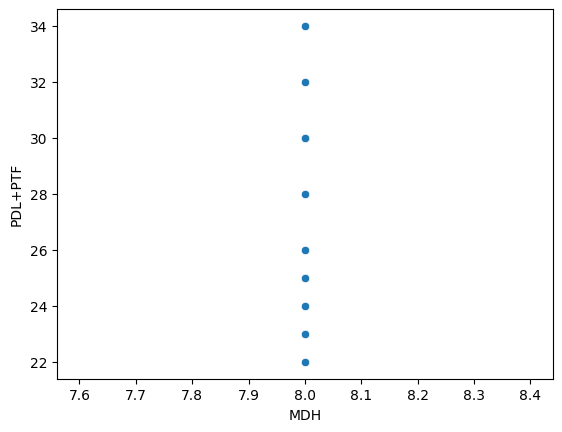

In [3]:

# I es el conjunto de enfermeras
I=df['Enfermeras'].values
I=EliminarDatosVacios(I)

# NV todas las enfermeras que no son vacacionales
NV=df['NV'].values
NV=EliminarDatosVacios(NV)

# L es las enfermeras que tienen vacaciones
L=df['L'].values
L=EliminarDatosVacios(L)

# K representa el día
K=df['K'].values
K=EliminarDatosVacios(K)

# Sat conjunto de sabados en el mes
Sat=df['Sat'].values
Sat=EliminarDatosVacios(Sat)

# Sun conjunto de domingos en el mes
Sun=df['Sun'].values
Sun=EliminarDatosVacios(Sun)

# fds son los fines de semana (?)
fds=df['fds'].values #pendiente porque son listas
fds=ArreglarMatricesExcel(fds)

# S es 
S=df['S'].values
S=EliminarDatosVacios(S)

#D es
D=df['D'].values #pendiente porque son listas
D=ArreglarMatricesExcel(D)

# P es
P=df['P'].values
P=int(P[0])

# DM es
DM=df['DM'].values
DM=int(DM[0])

# HMM es
HMM=df['HMM'].values
HMM=int(HMM[0])

# HA es
HA=df['HA'].values
HA=EliminarDatosVacios(HA)

#TF es turno fin de semana
TF=df['TF'].values
TF=EliminarDatosVacios(TF)

# DH es la diferencia horaria (?) de carga de trabajo (?)
DH=df['DH'].values #pendiente porque son listas 
DH=ArreglarMatricesExcel(DH)

# DLI es la lista de enfermeras con días libres?
DLI=df['DLI'].values #pendiente porque son listas
DLI=ArreglarMatricesExcel(DLI)

# TurnosZ son los turnos de la manaña
TurnosZ=df['Turnos Mañana'].values
TurnosZ=EliminarDatosVaciosParaStr(TurnosZ)

# HorariosZ son los horarios de los turnos de la manaña
HorariosZ=df['Horarios Turnos Mañana'].values
HorariosZ=ArreglarMatricesExcel(HorariosZ)

# TurnosB son los turnos de la tarde
TurnosB=df['Turnos Tarde'].values
TurnosB=EliminarDatosVaciosParaStr(TurnosB)

# HorariosB son los horarios de los turnos de la tarde
HorariosB=df['Horarios Turnos Tarde'].values
HorariosB=ArreglarMatricesExcel(HorariosB)

# Z es un lista/arreglo/vector que representa los turnos de la mañana
# B es una lista/arreglo vector que representa los turnos de la tarde
Z=[i for i in range(1,len(TurnosZ)+1)]
B=[i for i in range(1,len(TurnosB)+1)]

#TurnosYhorariosMañana y TurnosYhorariosTarde son arreglos que representan...
TurnosYhorariosMañana={}
TurnosYhorariosTarde={}

#??? qué se hace acá ???

for i in range(0,len(Z)):
    TurnosYhorariosMañana[i+1]=HorariosZ[i]

for i in range(0,len(B)):
    TurnosYhorariosTarde[i+1]=HorariosB[i]
    

for b in range(0,len(B)):
    if TurnosB[b]=="CHX":
        TurnoCHX=b+1
        

for z in range(0,len(Z)):
    if TurnosZ[z]=="COM":
        TurnoCOM=z+1
        
EnfCHX=df['Enf CHX'].values
EnfCHX=EliminarDatosVacios(EnfCHX)
EnfCHX=EnfCHX[0]

#llenar requerimientos segun lo indicado en el excel
reqs=df['Requerimientos Mañana'].values
reqs=ArreglarMatricesExcel(reqs)

reqsTarde=df['Requerimientos Tarde'].values
reqsTarde=ArreglarMatricesExcel(reqsTarde)

festivos=df['Festivos'].values
festivos=ArreglarMatricesExcel(festivos)
if len(festivos)>0:
    festivos=festivos[0]

MPR1=[[0 for k in K] for i in range(len(reqs))] #hay una lista para cada turno
MPR2=[[0 for k in K] for i in range(len(reqs))] #hay una lista para cada turno

for z in range(0, len(reqs)): #va a recorrer los 3 turnos que hay en la mañana
    
    for s in range(0,len(DH)):
        for k in DH[s-1]:
            MPR1[z][k-1]=reqs[z][0]
            MPR2[z][k-1]=reqsTarde[z][0]

    for i in range(0, len(fds)):
        for k in fds[i]:
            if k !=0:
                MPR1[z][k-1]=reqs[z][1]
                MPR2[z][k-1]=reqsTarde[z][1]
                
    if len(festivos)>0:
        for k in festivos:
            MPR1[z][k-1]=reqs[z][2]
            MPR2[z][k-1]=reqsTarde[z][2]
    
DispM=[[0 for k in K] for i in I]
DispA=[[0 for k in K] for i in I]

DispExcelM=df['Disponibilidad Mañanas'].values
DispExcelM=ArreglarMatricesExcel(DispExcelM)
DispExcelA=df['Disponibilidad Tardes'].values
DispExcelA=ArreglarMatricesExcel(DispExcelA)

for i in I:
    for s in range(0,len(DH)): #disponibilidad dias habiles
        for k in DH[s-1]:
            DispM[i-1][k-1]=DispExcelM[i-1][0]
            DispA[i-1][k-1]=DispExcelA[i-1][0]
            
        for dia in range(0, len(fds)):
            for k in fds[dia]:
                if k !=0:
                    DispM[i-1][k-1]=DispExcelM[i-1][1]
                    DispA[i-1][k-1]=DispExcelA[i-1][1]
            
        if len(festivos)>0:
            for k in festivos:
                DispM[i-1][k-1]=DispExcelM[i-1][1]
                DispA[i-1][k-1]=DispExcelA[i-1][1]

epsilon=100000000

# ultimo modelo

#ES MUY CONVENIENTE DEFINIR QUÉ ES CADA COSA:
# fo: función objetivo, I: conjunto de enfermeras, 

def modelo(fo, I, NV, Z, B, L, K, Sat, Sun, fds, S, D, P, DM, HMM, HA, TF, DH, MPR1, MPR2, DispM, DispA, DLI, epsilon=100000000):
    model=LpProblem("NSP",LpMinimize)

    if fo == 1:
        model = LpProblem("NSP.ipynb", LpMinimize)
    else:
        model = LpProblem("NSP.ipynb",LpMinimize)

    # variables
    x=LpVariable.dicts("x", (I,Z,K), cat="Binary")#1 si la enfermera i, trabaja en el turno z de la mañana, en el dia K
    u=LpVariable.dicts("u", (I,B,K), cat="Binary")#1 si la enfermera i, trabaja en el turno b de la tarde, en el dia K
    w=LpVariable.dicts("w", (I,K), cat="Binary")#1 si la enfermera i, tiene el dia K libre
    PTF=LpVariable("PTF",0,None, LpInteger)#penalización turno fds (acumula las veces que no se cumplio la preferencia)
    PDL=LpVariable("PDL",0,None, LpInteger) #penalización dia libre 
    y=LpVariable.dicts("y",(I),0,None, LpInteger)#turnos asignados en el mes a la enfermera i
    MDH=LpVariable("MDH",0,None, LpInteger)#máxima diferencia de turnos, diferencia entre los que se podian asignar teniendo en cuenta las horas acumuladas y los turnos que realmente se asignaron
    v=LpVariable.dicts("v",(I),0,None, LpInteger)#horas  'extras' que se asignan a la enfermera i para cumplir cubrir la demanda
    fo_1=LpVariable("fo_1",0,None,LpContinuous) #almacena fo 1
    fo_2=LpVariable("fo_2",0,None,LpContinuous) #almacena fo 2
    
    
    model+= fo_1 == MDH +lpSum([v[i]*(1/DM) for i in I])
    model+= fo_2 == PDL + PTF
    
    if fo == 1:
        model+= fo_1
    else: 
        model+= fo_2
        
    #restricciones
    #3 Balancear cantidad de turnos asignados en el mes  
    for i in I: 
        model+= y[i]==lpSum(x[i][z][k]for z in Z for k in K) + lpSum(u[i][b][k]  for k in K for b in B)

    #4 acumular la maxima diferencia entre los turnos maximos que pueden hacer y los 
    # que se les asignan, excepto las que tuvieron vacaciones ese mes
    for i in NV:
        model+=((HMM-HA[i-1])*(1/DM))-y[i]<=MDH
        model+= y[i]-((HMM-HA[i-1]))*(1/DM)<=MDH 

    #5 Solo se puede asignar un tipo de turno cada dia, para cada enfermera
    for i in I:
        for k in K:
            model+= lpSum(x[i][z][k]for z in Z) + lpSum(u[i][b][k]for b in B) + w[i][k] ==1

    #6 Horas máximas permitidas por enfermera al mes
    for i in I: 
        model+= y[i]*DM<=(HMM-HA[i-1])+v[i]

    #7 Personal mínimo en cada turno. Daily requirements
    for k in K:
        for z in Z:
            model+= lpSum(x[i][z][k] for i in I)==MPR1[z-1][k-1] #PONER ESTRICTAMENTE IGUAL, verificar si esta asignando mas de las necesarias y por eso el MDH da 0


    for k in K:
        for b in B:
            model+= lpSum(u[i][b][k] for i in I)==MPR2[b-1][k-1]

    #8 Se debe cumplir con la disponibilidad turno (mañana, tarde o cualquiera)
    for k in K:
        for i in I:  
            model+= lpSum(x[i][z][k] for z in Z)<=DispM[i-1][k-1]
            model+= lpSum(u[i][b][k] for b in B)<=DispA[i-1][k-1]

    #9 Fds libres

    for i in I:
        for j in range(0,len(fds)):
            if fds[j][0]!=0 and fds[j][1]!=0:
                model+=w[i][fds[j][0]]+w[i][fds[j][1]]>=1
            #else: aqui faltaria la opcione de que el fds de ese mes solo tenga un dia porque comienza ahi el mes o termina

    for i in I:
        DOff=0
        for j in range(0,len(fds)):
            for k in fds[j]:
                if k !=0 :
                    DOff=DOff+w[i][k]
        model+=DOff>=P #+1
              #si se les da un fds completo libre no da factible. con 8 enfermeras si da factible con 7 no


    #9 Acumular las veces que no se cumplio una peticion de dia libre

    model+= PDL==lpSum([DLI[i-1][k-1]-(w[i][k]*DLI[i-1][k-1]) for i in I for k in K])


    #9 Mismo turno toda la semana deja la posibilidad de dias libres entre semana
    for i in I:
        for z in Z:
            for b in B:
                for n in range (0,len(DH)):
                    for k in DH[n]:
                        for p in DH[n]:
                            if k!=0 and p!=0:                                
                                model+= (x[i][z][k]-x[i][z][p])<=w[i][p]
                                model+= u[i][b][k]-u[i][b][p]<=w[i][p]


    #10 que la enfermera que se asigna al turna al de CHX, sea la misma todo el mes
    
    for n in range (0,len(S)-1):
        for k in DH[n]:
            if k!=0 and k+7<=len(K):
                if k+7 in DH[n+1]:
                    model+= u[EnfCHX][TurnoCHX][k]-u[EnfCHX][TurnoCHX][k+7]==0
    
    #solo asignar la enf de CHX a los turnos de CHX
    
   
    model+=lpSum(u[i][TurnoCHX][k] for i in I if i!=EnfCHX for k in K)==0
        

    #11 Una enfermera no puede tener 2 turnos tipo “Completo” en 2 semanas seguidas

    for i in I:
        for n in range(0,len(S)-1):
            for k in DH[n]:
                if k!=0 and k+7<=len(K):
                    model+= x[i][TurnoCOM][k]+x[i][TurnoCOM][k+7]<=1

    #12 Rotación de turnos. si tiene un turno en la tarde no puede tener un turno en la mañana el día siguiente.
    for i in I:
        for k in range (1,len(K)):
            model+= lpSum(u[i][b][k]for b in B) + lpSum(x[i][z][k+1] for z in Z)<=1     

    #13 Asegurar que la enfermera no tenga turnos durante los días solicitados en vacaciones

    for i in L:
        for k in D[i-1]:
            model+= lpSum([x[i][z][k] for z in Z])==0
            model+= lpSum([u[i][b][k] for b in B])==0

    #14 Preferencia de turno los fines de semana
    PT=0
    for i in I:
        for k in Sat+Sun:
                PT=PT+lpSum(u[i][b][k] for b in B)-TF[i-1]+(TF[i-1]*2*lpSum(x[i][z][k] for z in Z))+(w[i][k]*TF[i-1])

    model+=PTF==PT
    
    if fo==2:
        model+=fo_1<=epsilon
    else:
        model+=fo_2<=epsilon

    # set solver log to false
    model.solve(PULP_CBC_CMD(msg=False))
    
   

    return model
    # return fo_1.varValue, fo_2.varValue

resultado = epsilon_restricciones(modelo, 10, I, NV, Z, B, L, K, Sat, Sun, fds, S, D, P, DM, HMM, HA, TF, DH, MPR1, MPR2, DispM, DispA, DLI)

#resultado['PTF'].varValue
#resultado['PDL'].varValue
#resultado['MDH'].varValue
#resultado['y_7'].varValue

#I.insert(Maira-1,Maira)
#print(I)  
#I.remove(Maira)



ListaEnfDispA=[[] for k in K] #disp para backup en la tarde, quiere decir que trabajo en la mañana o tuvo el dia libre pero no esta en vacaciones
ListaEnfDispM=[[] for k in K] 
free=[[]for k in K ] #enfermeras en el dia k que tienen el dia libre y no estan de vacaciones

Maira=7
I.remove(Maira)

AsignacionesX={} #diccionario con la variable x de la solucion escogida. 
AsignacionesU={} #diccionario con la variable u de la solucion escogida. 
AsignacionesW={} #diccionario con la variable w de la solucion escogida.
AsignacionesY={}


In [8]:


# llenar free
for k in K:
    for i in I:
        if (i,k) in AsignacionesW.keys() and AsignacionesW[i,k]==1 and k not in D[i-1]:
            free[k-1].append(i)
            
            
# llenar las listas, enfermeras disponibles para hacer backup cada dia.            
for k in K:
    for z in Z:
        for i in I: 
            if (i,z,k) in AsignacionesX.keys() and AsignacionesX[i,z,k]!=0: #aqui agrego las que trabajaron en la mañana

                ListaEnfDispA[k-1].append(i)
for k in K:#aqui agrego las que estan libres y no en vacaciones
     for i in free[k-1]:
        ListaEnfDispA[k-1].append(i)
                       
for k in K:
    for b in B:
        for i in I: 
            if (i,b,k) in AsignacionesU.keys() and AsignacionesU[i,b,k]!= 0: #aqui agrego las que trabajaron en la tarde   
                 ListaEnfDispM[k-1].append(i)
for k in K:#aqui agrego las que estan libres y no en vacaciones
     for i in free[k-1]:
        ListaEnfDispM[k-1].append(i)           
          
            
I.insert(Maira-1,Maira)
print(I)       

NOdispA=[]
NOdispM=[]
for k in K:
    SetI=set(I)
    SetDispA=set(ListaEnfDispA[k-1])
    SetDispM=set(ListaEnfDispM[k-1])
    NOdispA.append(SetI-SetDispA)
    NOdispM.append(SetI-SetDispM)
    
#print (NOdispM[0])
#for i in NOdispM[0]:
 #   print(i)
    
   
#Cantidad de turnos que se asignaron
Shifts=[]
for i in AsignacionesY.keys():
    Shifts.append(AsignacionesY[i])
    



[1, 2, 3, 4, 5, 6, 7, 8]


In [9]:

#PARTE PREVENTIVA
#esta parte esta asignando 2 backups cada dia uno en la mañana y otro en la tarde
#primero mira si hay enfermeras descansando ese dia y asigna esas como back up 
# las enfermeras que estan libres pueden ser asignadas como backup dias seguidos, las que estan en turno no
#

#La FO esta minimizando la diferencia de backups entre ellas, para que se les asignen cantidades cercanas

from pulp import *
model2=LpProblem("Preventive",LpMinimize)

#VARIABLES
BUM=LpVariable.dicts("BUM",(I,K), cat="Binary")#dice 1 si la enfermera i es asignada como back up para la mañana del día K
BUA=LpVariable.dicts("BUA",(I,K), cat="Binary")#dice 1 si la enfermera i es asignada como back up para la tarde del día K
NumBackups=LpVariable.dicts("NumBackups",(I),0,None, LpInteger)
Diferencia=LpVariable("Diferencia",0,None, LpInteger)
TotalShifts=LpVariable.dicts("TotalShifts",(I),0,None, LpInteger)

#FO
model2+=Diferencia

backUpM=[0 for k in K]
backUpA=[0 for k in K]


#restricciones para establecer la máxima diferencia de backups asignados
for i in I:
    #model2+=NumBackups[i]== lpSum(BUM[i][k]for k in K)+ lpSum(BUA[i][k] for k in K)
    model2+=TotalShifts[i]== Shifts[i-1]+lpSum(BUM[i][k]for k in K)+ lpSum(BUA[i][k] for k in K)

for i in I:
    for e in I:
        #model2+=NumBackups[i]- NumBackups[e]<= Diferencia #con esta minimizo la dif de back ups 
       # model2+=NumBackups[e]- NumBackups[i]<= Diferencia
        
        model2+=TotalShifts[e]- TotalShifts[i]<= Diferencia #con este minimizo la diferencia de turnos totales
        model2+=TotalShifts[i]- TotalShifts[e]<= Diferencia

# Todos los dias debe haber un back up asignado, solo teniendo en cuenta las enfermeras disponibles en cada turno paras ser back up
for k in K:
        model2+=lpSum(BUM[i][k]for i in ListaEnfDispM[k-1])==1
        model2+=lpSum(BUM[i][k]for i in NOdispM[k-1])==0
        
        model2+=lpSum(BUA[i][k]for i in NOdispA[k-1])==0
        model2+=lpSum(BUA[i][k] for i in ListaEnfDispA[k-1])==1
        
# Una enfermera que tiene el dia libre ser backup en la mañana o en la tarde no en ambos, el resto no necesita esta restriccion porque solo tienen disponibilidad para un backup
for k in K:
    for i in free[k-1]:
        model2+=BUM[i][k]+BUA[i][k]<=1
    
#Asignación de las que están libres. obligatoriamente si hay enfermeras libres las uso como back up para que las otras no se tengan que doblar 

for k in K:
    if len(free[k-1])>=2: #aqui le pongo >=2 porque si hay dos libres ese dia puedo poner una de backup en la mañana y otra en la tarde
        model2+=lpSum(BUM[i][k]for i in free[k-1])==1
        model2+=lpSum(BUA[i][k]for i in free[k-1])==1
    if len(free[k-1])==1: # si solo hay una libre la voy a poner de back up en solo un turno
        model2+= lpSum(BUM[i][k]for i in free[k-1])==1 or lpSum(BUA[i][k]for i in free[k-1])==1
                
#podria usar la logica de primero usar las que estan libres, luego las que tienen menos turnos ese mes asi, no sobre cargo a las demas



#no se puede ser back up 2 dias seguidos

for i in I:
    for k in range(1,len(K)):
        if i not in free[k-1]:   
            model2+= BUA[i][k]+BUM[i][k]+ BUA[i][k+1]+ BUM[i][k+1]<=1


#llenar la lista con los backups        
        
model2.solve()

print ("Status:", LpStatus[model2.status])

for v in model2.variables():
    print(v.name, "=", v.varValue)

for i in I:
    for dia in K:
    
        if value(BUA[i][dia])==1:
            print(BUA[i][dia],value(BUA[i][dia]))
        if value(BUM[i][dia])==1:
            print(BUM[i][dia],value(BUM[i][dia])) 
            

#AsignacionesX={} #diccionario con la variable x de la solucion escogida. 
#AsignacionesU={} #diccionario con la variable u de la solucion escogida. 
#AsignacionesW={} #diccionario con la variable w de la solucion escogida.
#AsignacionesY={}

#x[enf][turnoMañana][dia]
#u[enf][turnoTarde][dia]
#w[enf][dia]

for i in I:
    for z in Z:
        for k in K:
            p = ['x', i, z, k]
            p2 = f'{p[0]}_{p[1]}_{p[2]}_{p[3]}'
            #print( p[1],p[2],p[3], resultado[p2].varValue )
            AsignacionesX[p[1],p[2],p[3]]=resultado[p2].varValue 

AsignacionesX

for i in I:
    p = ['y', i]
    p2 = f'{p[0]}_{p[1]}'
    AsignacionesY[p[1]]=resultado[p2].varValue 

for i in I:
    for b in B:
        for k in K:
            p = ['u', i, b, k]
            p2 = f'{p[0]}_{p[1]}_{p[2]}_{p[3]}'
           
            #print( p[1],p[2],p[3], resultado[p2].varValue )
            AsignacionesU[p[1],p[2],p[3]]=resultado[p2].varValue 
AsignacionesU

for i in I:
    for k in K:
        p = ['w', i, k]
        p2 = f'{p[0]}_{p[1]}_{p[2]}'
        #print( p[1],p[2],p[3], resultado[p2].varValue )
        AsignacionesW[p[1],p[2]]=resultado[p2].varValue 

AsignacionesW


#vector EH que se le entrega al VRP Vector de enfermeras asignadas cada día
EHprueba=[[] for k in K]
DiasPorSemana=df['Dias semana'].values
DiasPorSemana=ArreglarMatricesExcel(DiasPorSemana)

#no puedo entregar semanas incompletas al VRP. primer dia es el sabado, si queda incompleta hay que arreglarlo

for k in K: #dias
    for i in I: 
        for z in Z:
            if AsignacionesX[i, z, k]==1 and i not in EHprueba[k-1] :
                EHprueba[k-1].append(i) 
              #  print(x[i][z][k], x[i][z][k].value)
        for b in B:
            if AsignacionesU[i,b,k]==1 and i not in EHprueba[k-1]:
                EHprueba[k-1].append(i)
                
print(EHprueba)

EH=[[] for s in S] #enf disponibles en todas las semanas

for s in S:
    for k in DiasPorSemana[s-1]:
        EH[s-1].append(EHprueba[k-1])       
print("")

print(EH[1-1])

#vector c y d de las horas disponibles segun el turno que tienen C es una matriz que contiene las horas de inicio de cada una de las enfermeras en cada día de la semana
# D es la matriz de hora de finalización de cada una de las enfermeras en cada día de la semana
CdeTodaslasSemanas=[[] for s in S]
DdeTodaslasSemanas=[[] for s in S]

for i in I:
    for s in S:
        CdeLaSemana=[0 for k in DiasPorSemana[s-1]]
        DdeLaSemana=[0 for k in DiasPorSemana[s-1]]
        contador=0
        for k in DiasPorSemana[s-1]:
            for z in Z:
                if AsignacionesX[i,z,k]==1:
                    CdeLaSemana[contador]=TurnosYhorariosMañana[z][0]
                    DdeLaSemana[contador]=TurnosYhorariosMañana[z][1]
                    
            for b in B:
                if AsignacionesU[i,b,k]==1:
                    CdeLaSemana[contador]=TurnosYhorariosTarde[b][0]
                    DdeLaSemana[contador]=TurnosYhorariosTarde[b][1]
                
            contador=contador+1 
        
        CdeTodaslasSemanas[s-1].append(CdeLaSemana)
        DdeTodaslasSemanas[s-1].append(DdeLaSemana)
        
# BU son las listas de la enfermeras que estarán de backup en cada turno

BUmañana=[]
BUtarde=[]

for s in S:
    lista=[]
    lista2=[]
    for k in DiasPorSemana[s-1]:
        for i in I:
            if value(BUM[i][k])==1:
                
                lista.append(i)
            if value(BUA[i][k])==1:
                lista2.append(i)
            

    BUmañana.append(lista)
    BUtarde.append(lista2)
    
print("bum",BUmañana)
print("but",BUtarde)


def DevolverEH_C_D(semana): #le doy el número de la semana del mes que corri y me devuelve el EH (enf en cada dia), el c y el d (tw enfermeras)
    Enfdisp=EH[semana-1]
    c=CdeTodaslasSemanas[semana-1]
    d=DdeTodaslasSemanas[semana-1]
    BUm=BUmañana[semana-1]
    BUa=BUtarde[semana-1]
    return(Enfdisp,c,d,BUm,BUa)

x=DevolverEH_C_D(1)
print(x)


AsignacionesY



#imprimir tabla de la programacion del mes 
df = pd.DataFrame()
I2=[enfe for enfe in I]
I2.append("BackUp Mañanas")
I2.append("BackUp Tardes")
Maira=7

df["Personal"]=I2

for s in S:
    cont=0
    for k in DiasPorSemana[s-1]:
        TurnosEnfDia=[0 for i in I2] #pos1 esta el turno de la en2 en pos2 la el de la 2 y asi..
        for i in I:
            for z in Z:
                if AsignacionesX[i,z,k]==1:
                    TurnosEnfDia[i-1]=TurnosZ[z-1]

            for b in B:
                if AsignacionesU[i,b,k]==1:
                    TurnosEnfDia[i-1]=TurnosB[b-1]

            if AsignacionesW[i,k]==1:
                TurnosEnfDia[i-1]="Libre"
        
            if i==Maira:
                if s<=len(DH):
                    if k in DH[s-1]:
                        TurnosEnfDia[i-1]="Admin"
                    
        TurnosEnfDia[len(I)]=BUmañana[s-1][cont]   
        TurnosEnfDia[len(I)+1]=BUtarde[s-1][cont] 
        cont=cont+1
        

        df[k]=TurnosEnfDia

df.to_excel('ProgramaciónTurnos.xlsx', index=False)

IndexError: list index out of range